In [525]:
from lifelines import KaplanMeierFitter 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [526]:
data=pd.read_csv('data.csv')

In [527]:
data.head()

user_id  interval_between_bookings  not_book_interval rank
0      283                         38                 38    B
1     1101                         62                 62    A
2     1329                          3                  3    A
3     2091                        176                176    B
4     2438                         54                 54    B

In [528]:
#data['observe']=np.where(data.not_book_interval >=90,0,1)
data['observe']=1

In [529]:
sum(data[data.observe==0]['not_book_interval'])/90==len(data[data.observe==0])

True

In [530]:
#data.loc[(data.not_book_interval >=90),'not_book_interval']=90

In [531]:
data.head()

user_id  interval_between_bookings  not_book_interval rank  observe
0      283                         38                 38    B        1
1     1101                         62                 62    A        1
2     1329                          3                  3    A        1
3     2091                        176                176    B        1
4     2438                         54                 54    B        1

In [532]:
dataset=data.drop(['user_id'],axis=1)

In [533]:
dataset.head()

interval_between_bookings  not_book_interval rank  observe
0                         38                 38    B        1
1                         62                 62    A        1
2                          3                  3    A        1
3                        176                176    B        1
4                         54                 54    B        1

In [479]:
len(dataset[dataset.observe==1]['not_book_interval'])*0.15

1595.1

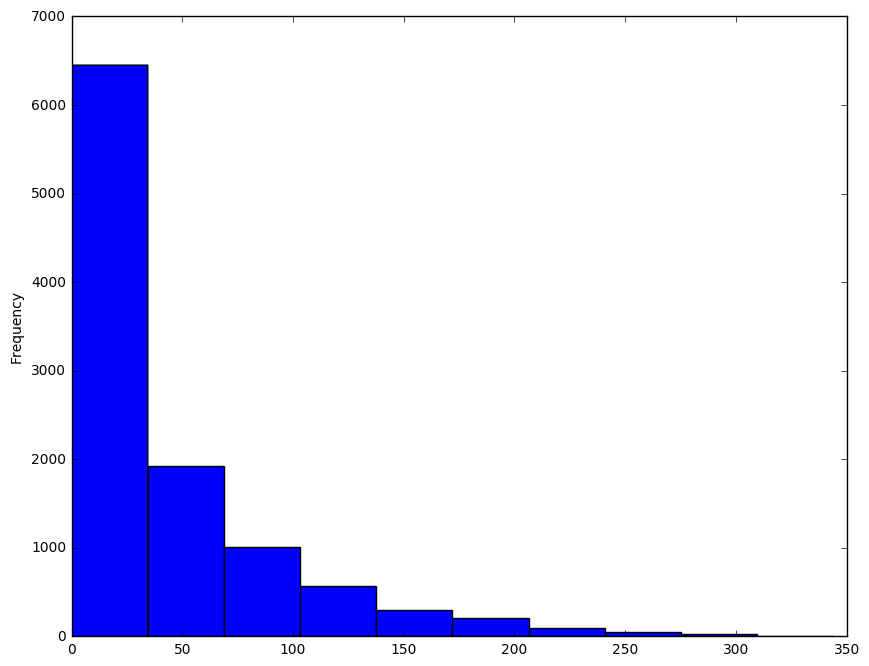

In [480]:
dataset[dataset.observe==1]['not_book_interval'].plot(kind='hist')

plt.show()

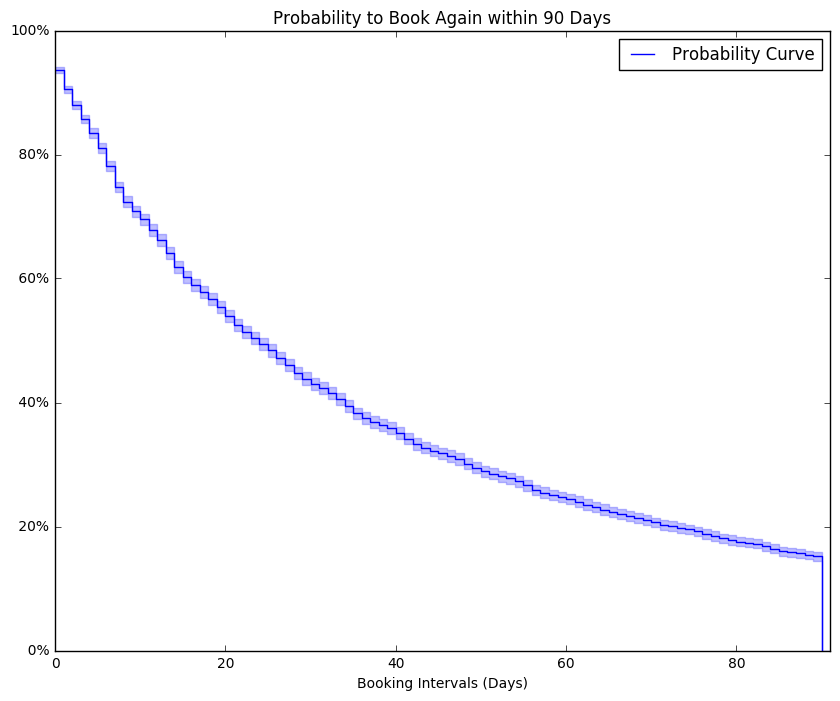

In [492]:
index=random.sample(range(dataset.shape[0]),10000)
kmf=KaplanMeierFitter()
kmf.fit(durations=dataset.ix[index].not_book_interval,event_observed=dataset.ix[index].observe,label='Probability Curve')
#plt.figure(figsize=(12,10))
ax=plt.subplot(111)
plt.rcParams["figure.figsize"] = (10,8)
p=kmf.plot(ci_force_lines=False,title='Probability to Book Again within 90 Days',ax=ax)
plt.ylim([0.0,1.0])
vals=ax.get_yticks()
ax.set_yticklabels(['{:3.0f}%'.format(x*100) for x in vals])
plt.xlabel('Booking Intervals (Days)')
plt.xlim([0,91])


plt.show()


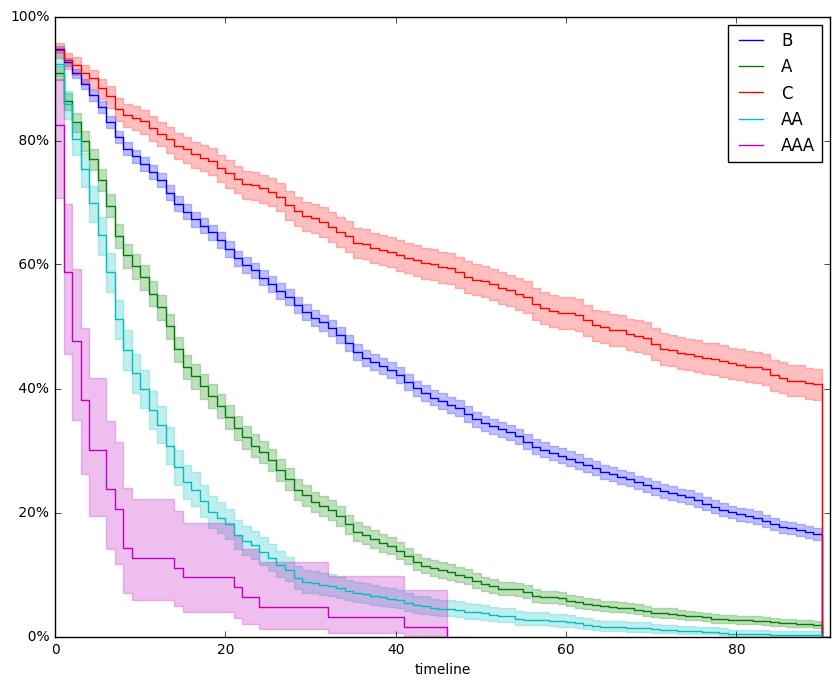

In [494]:
ax=plt.subplot(111)
for r in data['rank'].unique():
    ix=data['rank']==r
    kmf=KaplanMeierFitter()
    kmf.fit(data['not_book_interval'].ix[ix],data['observe'].ix[ix],label=r)
    ax=kmf.plot(ax=ax)

plt.xlim([0,91])
plt.ylim([0.0,1.0])
vals=ax.get_yticks()
ax.set_yticklabels(['{:3.0f}%'.format(x*100) for x in vals])
plt.show()

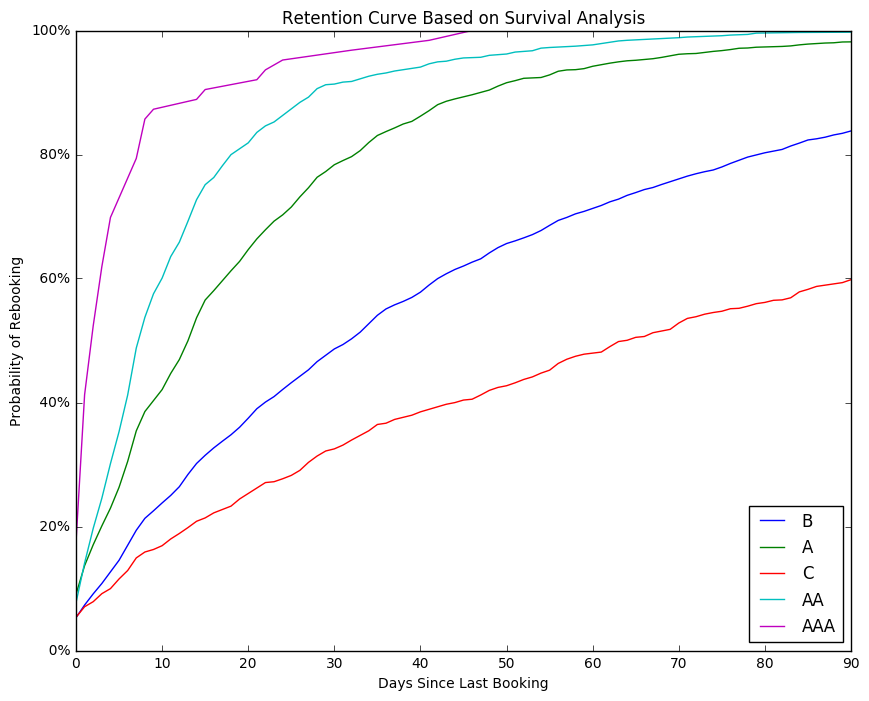

In [534]:
ax=plt.subplot(111)
for r in data['rank'].unique():
    ix=data['rank']==r
    kmf=KaplanMeierFitter()
    kmf.fit(data['not_book_interval'].ix[ix],data['observe'].ix[ix],label=r)
    ax.plot(kmf.survival_function_.index,1.0-kmf.survival_function_.values,label=r)

plt.xlim([0,90])
plt.ylim([0.0,1.0])
plt.legend(loc='best')
plt.xlabel('Days Since Last Booking')
plt.ylabel('Probability of Rebooking')
plt.title('Retention Curve Based on Survival Analysis')
vals=ax.get_yticks()
ax.set_yticklabels(['{:3.0f}%'.format(x*100) for x in vals])
plt.show()

In [516]:
1-kmf.survival_function_.values

array([[ 0.17460317],
       [ 0.41269841],
       [ 0.52380952],
       [ 0.61904762],
       [ 0.6984127 ],
       [ 0.76190476],
       [ 0.79365079],
       [ 0.85714286],
       [ 0.87301587],
       [ 0.88888889],
       [ 0.9047619 ],
       [ 0.92063492],
       [ 0.93650794],
       [ 0.95238095],
       [ 0.96825397],
       [ 0.98412698],
       [ 1.        ]])

In [511]:
kmf.survival_function_.columns

Index(['AAA'], dtype='object')